# K Vecinos más cercanos con Python

¡Le dieron un conjunto de datos clasificados de cancer de mama! 
¡Comencemos!

## Importación de librerias



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Obtener los datos

Establecer index_col=0 para usar la primera columna como índice.

In [2]:
df = pd.read_csv("breast_cancer.csv")

In [3]:
df.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## Estandarizar las variables

Debido a que el clasificador KNN predice la clase de una observación de prueba dada a través de la identificación de las observaciones que están más cerca de ella, la escala de las variables es importante. Cualquier variable que tenga una gran escala tendrá un efecto mucho mayor en la distancia entre las observaciones que las variables que están en una escala pequeña, y por lo tanto en el clasificador KNN.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [9]:
scaler.fit(df.drop('uniformity_of_cell_shape',axis=1))

/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_features = scaler.transform(df.drop('uniformity_of_cell_shape',axis=1))

/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [12]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis
0,0.159110,-0.728276,-0.642730,-0.564008,0.164373,-0.211089,-0.644129,-0.359946,-0.759063
1,0.159110,0.271858,0.750464,1.607310,0.164935,-0.211089,-0.320357,-0.359946,-0.759063
2,-0.531986,-0.728276,-0.642730,-0.564008,0.164436,-0.211089,-0.644129,-0.359946,-0.759063
3,0.504658,1.605371,-0.642730,-0.129745,0.164561,-0.211089,1.298500,-0.359946,-0.759063
4,-0.186438,-0.728276,0.053867,-0.564008,0.164373,-0.211089,-0.644129,-0.359946,-0.759063


## División en conjunto de entrenamiento y prueba

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['uniformity_of_cell_shape'],
                                                    test_size=0.30)

## Uso de KNN (K vecinos más cercanos)

Recuerde que estamos tratando de encontrar un modelo para predecir si algo es TARGET CLASS o no. Comenzaremos con k = 1.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [19]:
pred = knn.predict(X_test)

## Predicciones y Evaluaciones

¡Evaluemos nuestro modelo KNN!

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(confusion_matrix(y_test,pred))

[[66 11  2  1  0  0  0  0  0  0]
 [10  3  1  2  1  0  0  0  0  0]
 [ 4  2  3  0  1  0  1  1  0  0]
 [ 1  0  1  1  4  1  1  0  0  3]
 [ 1  0  0  3  0  2  1  2  0  1]
 [ 0  0  0  0  3  0  1  0  1  1]
 [ 0  0  0  0  0  3  4  0  1  2]
 [ 0  0  1  2  1  0  0  0  0  3]
 [ 0  0  0  0  0  1  0  1  1  1]
 [ 0  1  0  1  0  1  0  2  1  7]]


In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.80      0.82      0.81        80
           2       0.18      0.18      0.18        17
           3       0.38      0.25      0.30        12
           4       0.10      0.08      0.09        12
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         6
           7       0.50      0.40      0.44        10
           8       0.00      0.00      0.00         7
           9       0.25      0.25      0.25         4
          10       0.39      0.54      0.45        13

   micro avg       0.50      0.50      0.50       171
   macro avg       0.26      0.25      0.25       171
weighted avg       0.49      0.50      0.49       171



## Elección del valor de K

Avancemos y usemos el método del codo para elegir un buen valor de K:

In [23]:
#Forma en la que se calcula el error
pron=[0,1,0,1,0]
real=[0,1,0,1,1]
c=np.mean(np.array(pron) != np.array(real))
print(c)

0.2


In [24]:
tasa_error = []

# Tomará algún tiempo
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    tasa_error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Tasa de Error')

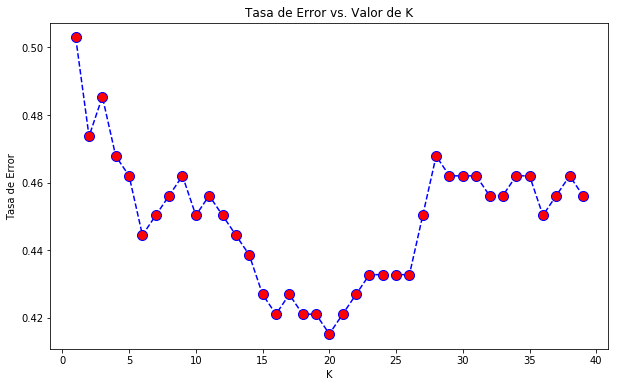

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),tasa_error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

Aquí podemos ver que después de aplicar K> 23, la tasa de error tiende a rondar los 0.06-0.05. Reentrenemos el modelo con este dato y verifiquemos el informe de clasificación.

In [26]:
# PRIMERO UNA COMPARACIÓN RÁPIDA CON EL K=25 ORIGINAL
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('CON K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

CON K=1


[[80  0  0  0  0  0  0  0  0  0]
 [14  0  1  0  2  0  0  0  0  0]
 [ 6  0  2  1  2  1  0  0  0  0]
 [ 2  0  2  1  2  2  0  0  0  3]
 [ 2  0  0  1  2  3  0  0  0  2]
 [ 1  0  0  0  1  2  0  0  0  2]
 [ 0  0  0  1  0  3  1  1  0  4]
 [ 0  0  0  0  1  0  1  0  0  5]
 [ 0  0  0  0  0  1  1  0  0  2]
 [ 0  0  0  2  0  2  0  0  0  9]]


              precision    recall  f1-score   support

           1       0.76      1.00      0.86        80
           2       0.00      0.00      0.00        17
           3       0.40      0.17      0.24        12
           4       0.17      0.08      0.11        12
           5       0.20      0.20      0.20        10
           6       0.14      0.33      0.20         6
           7       0.33      0.10      0.15        10
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          10       0.33      0.69      0.45        13

   micro avg       0.57      0.57      0.57       171
   macr

/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
# AHORA CON K=10
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('CON K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

CON K=30


[[138   8]
 [  9 145]]


             precision    recall  f1-score   support

          0       0.94      0.95      0.94       146
          1       0.95      0.94      0.94       154

avg / total       0.94      0.94      0.94       300



# Buen Trabajo!

¡Podemos mejorar más el rendimiento de nuestro modelo al encontrar un mejor valor de K!